In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from matplotlib import pyplot

In [ ]:
df=pd.read_csv('Mall_Customers.csv')

In [ ]:
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.shape

(200, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [ ]:
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1       0   19                  15                      39
1           2       0   21                  15                      81
2           3       1   20                  16                       6
3           4       1   23                  16                      77
4           5       1   31                  17                      40


c:\Users\roaal\anaconda3\New folder\New folder\envs\copy\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\roaal\anaconda3\New folder\New folder\envs\copy\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\roaal\anaconda3\New folder\New folder\envs\copy\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


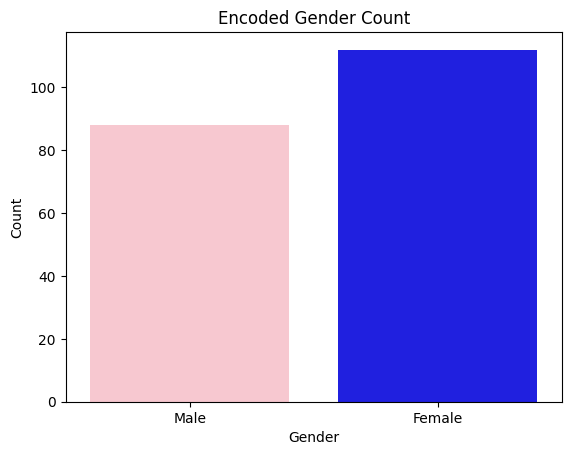

In [ ]:
sns.countplot(data=df, x='Gender', palette=['pink', 'blue'])
plt.title('Encoded Gender Count')
plt.xticks([0, 1], ['Male', 'Female'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [ ]:
#female's number is higher than male's

In [ ]:
youngest_age = df['Age'].min()
oldest_age = df['Age'].max()

print("Youngest age:", youngest_age)
print("Oldest age:", oldest_age)

Youngest age: 18
Oldest age: 70


c:\Users\roaal\anaconda3\New folder\New folder\envs\copy\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\roaal\anaconda3\New folder\New folder\envs\copy\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\roaal\anaconda3\New folder\New folder\envs\copy\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


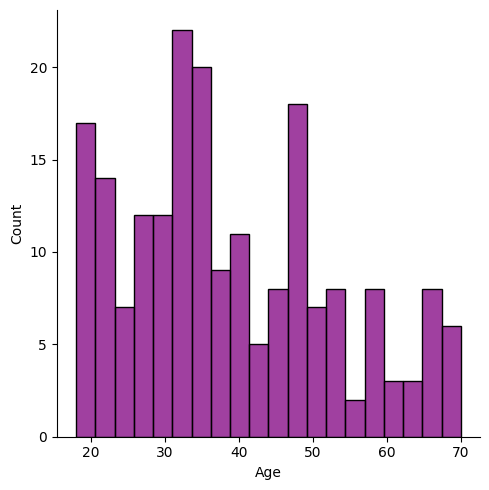

In [ ]:
sns.displot(df['Age'], bins=20, color = 'purple')

In [ ]:
#Ages are ranging from 20 to 70 and we could see that from 30's to 40's we got the greatest count

In [ ]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

cnt=0
for i in range(len(df)):
  if df['Age'].iloc[i] > upper_bound:
          cnt+=1
  if df['Age'].iloc[i] < lower_bound:
          cnt+=1
print(cnt)

0


In [ ]:
Q1 = df['Annual Income (k$)'].quantile(0.25)
Q3 = df['Annual Income (k$)'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

cnt=0
for i in range(len(df)):
  if df['Annual Income (k$)'].iloc[i] > upper_bound:
          cnt+=1
  if df['Annual Income (k$)'].iloc[i] < lower_bound:
          cnt+=1
print(cnt)

2


<Axes: >

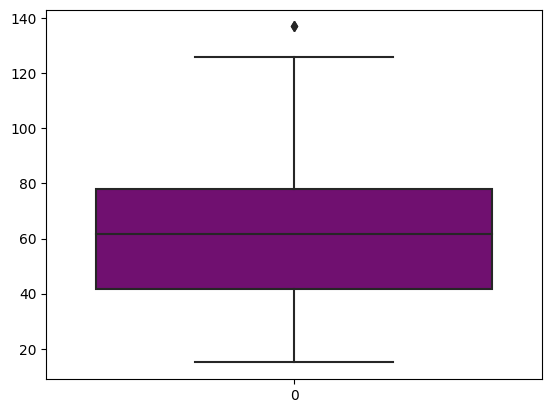

In [ ]:

sns.boxplot(df['Annual Income (k$)'], color = 'purple')


In [ ]:
max_income = df['Annual Income (k$)'].max()
for i in range(len(df)):
    if df['Annual Income (k$)'].iloc[i] > upper_bound:
        df['Annual Income (k$)'].iloc[i] = max_income

In [ ]:
Q1 = df['Spending Score (1-100)'].quantile(0.25)
Q3 = df['Spending Score (1-100)'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

cnt=0
for i in range(len(df)):
  if df['Spending Score (1-100)'].iloc[i] > upper_bound:
          cnt+=1
  if df['Spending Score (1-100)'].iloc[i] < lower_bound:
          cnt+=1
print(cnt)

0


In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
variances = df.var()
print(variances)

CustomerID                3350.000000
Gender                       0.247638
Age                        195.133166
Annual Income (k$)         689.835578
Spending Score (1-100)     666.854271
dtype: float64


c:\Users\roaal\anaconda3\New folder\New folder\envs\copy\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\roaal\anaconda3\New folder\New folder\envs\copy\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\roaal\anaconda3\New folder\New folder\envs\copy\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\roaal\anaconda3\New folder\New folder\envs\copy\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as

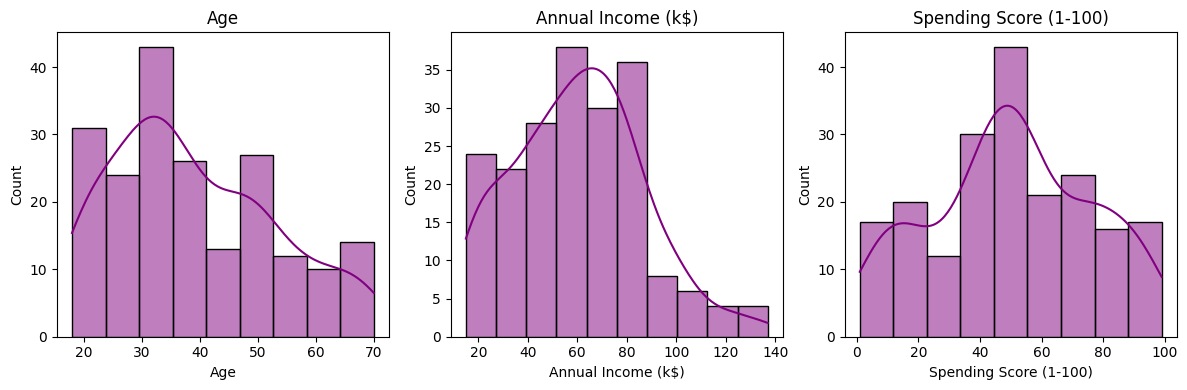

In [ ]:
numerical_columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
plt.figure(figsize=(12, 4))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[column], kde=True, color='purple')
    plt.title(column)
plt.tight_layout()
plt.show()

In [ ]:
#all of 3 data are in well distribution, so standar scaler isnt needed

In [ ]:
#Bivariate Analysis

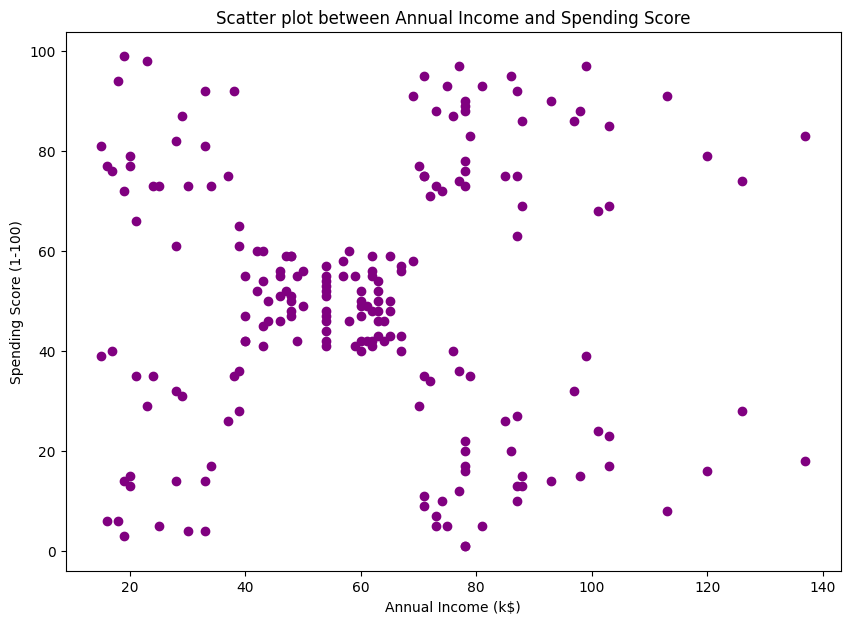

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],  color='purple')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Scatter plot between Annual Income and Spending Score')
plt.show()

In [ ]:
#annual incomes from 40 to mid 60 have a spending score ranging from 40 to 60

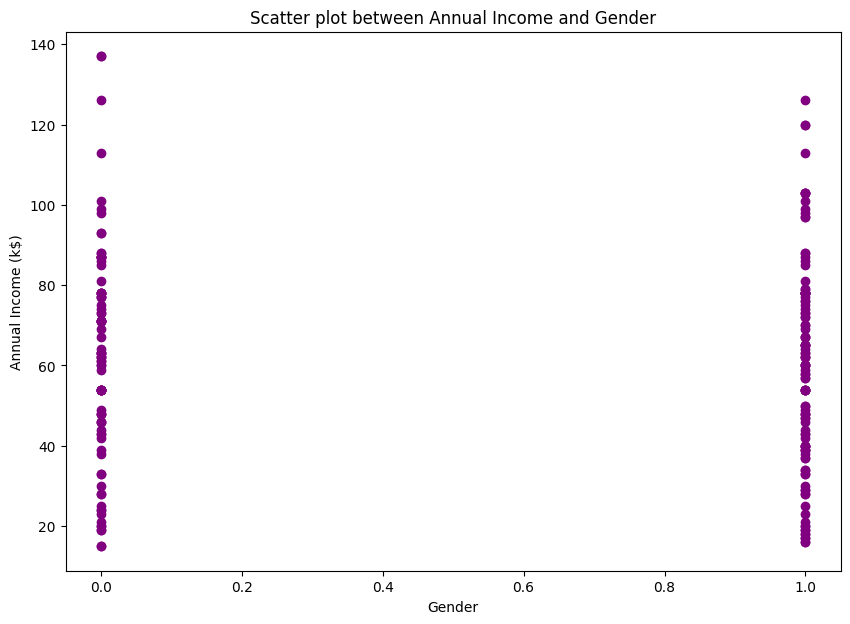

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(df['Gender'], df['Annual Income (k$)'],  color='purple')
plt.xlabel('Gender')
plt.ylabel('Annual Income (k$)')
plt.title('Scatter plot between Annual Income and Gender')
plt.show()

In [ ]:
#they look slightly the same but male have quiet greater annual income

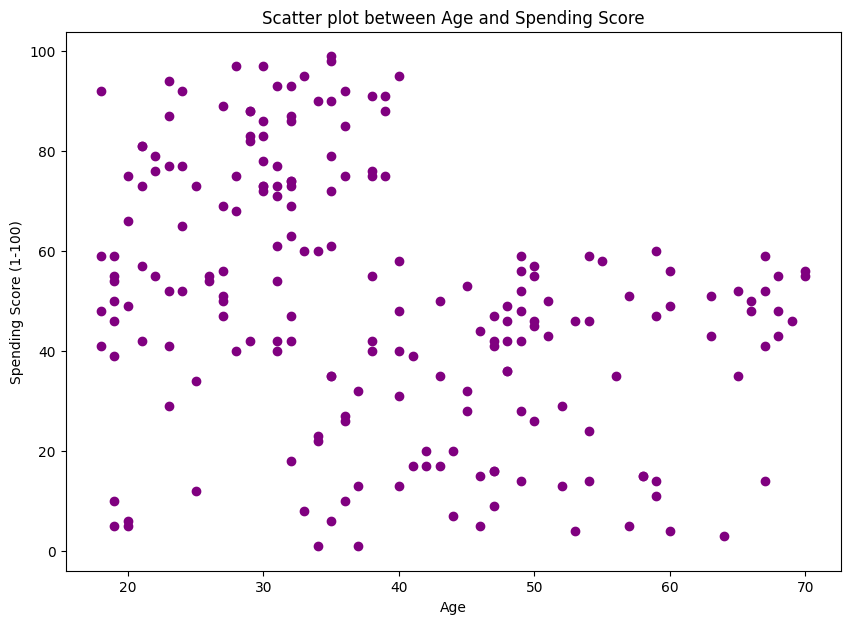

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(df['Age'], df['Spending Score (1-100)'],  color='purple')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Scatter plot between Age and Spending Score')
plt.show()

In [ ]:
#we could see an empty spot in the upper right corner which made us observe that younger ages spend more than ages from 40 to 70

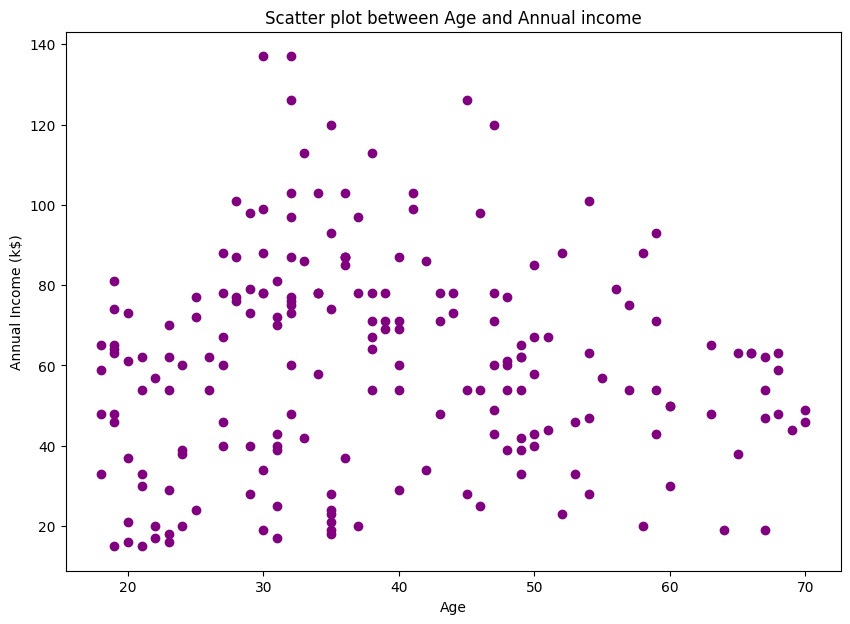

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(df['Age'], df['Annual Income (k$)'],  color='purple')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Scatter plot between Age and Annual income')
plt.show()

In [ ]:
#annual income for young adults is quiet simillar to ones in retierment, the highest annual income between 30's to 50's

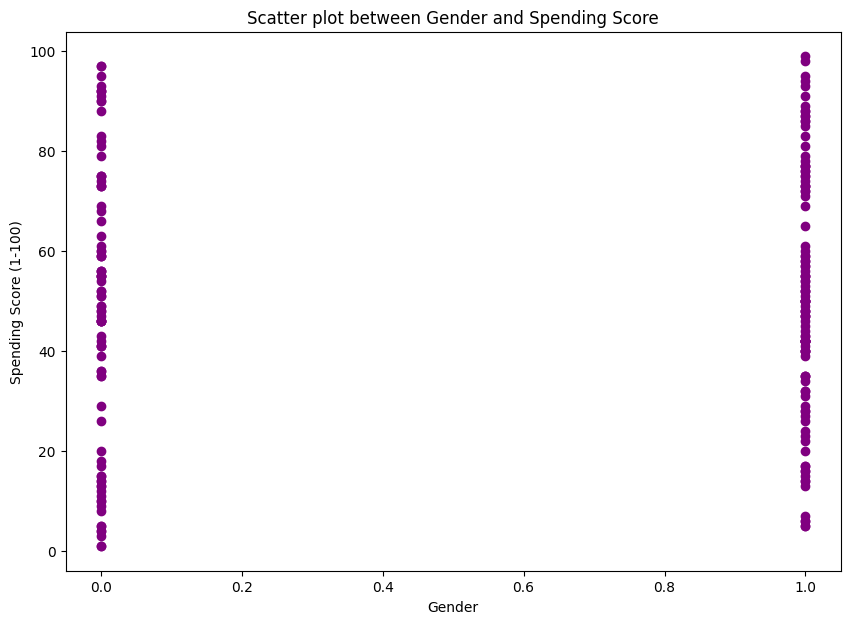

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(df['Gender'], df['Spending Score (1-100)'],  color='purple')
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)')
plt.title('Scatter plot between Gender and Spending Score')
plt.show()

In [ ]:
#despite, that women annual income is less than men's they tend to have higher spending score. women starting spending score is slightly higher than men

In [ ]:
df_copy=df.copy()

In [ ]:
df_copy=df_copy.drop("CustomerID", axis=1)

In [ ]:
df_copy.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [ ]:
#clustering

c:\Users\roaal\anaconda3\New folder\New folder\envs\copy\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\roaal\anaconda3\New folder\New folder\envs\copy\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\roaal\anaconda3\New folder\New folder\envs\copy\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\roaal\anaconda3\New folder\New folder\envs\copy\Lib\site-packages\skle

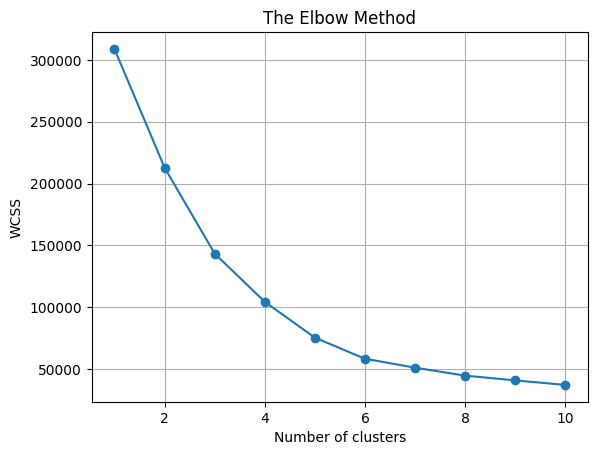

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_copy)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss,'o-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, init='random', max_iter=300,random_state=0)

c:\Users\roaal\anaconda3\New folder\New folder\envs\copy\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\roaal\anaconda3\New folder\New folder\envs\copy\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\roaal\anaconda3\New folder\New folder\envs\copy\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\roaal\anaconda3\New folder\New folder\envs\copy\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: i

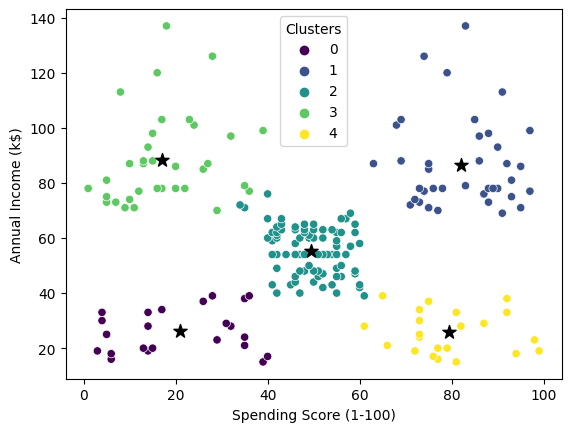

In [ ]:
y_predicted = kmeans.fit_predict(df_copy[['Annual Income (k$)','Spending Score (1-100)']])
df_copy['Clusters'] = kmeans.labels_
cluster_centers = kmeans.cluster_centers_
sns.scatterplot(x="Spending Score (1-100)", y="Annual Income (k$)",hue = 'Clusters',  data=df_copy,palette='viridis')
plt.scatter(cluster_centers[:, 1], cluster_centers[:, 0], marker='*', color='black', s=100, label='Centroids')


In [ ]:
df_copy.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,0,19,15,39,0
1,0,21,15,81,4
2,1,20,16,6,0
3,1,23,16,77,4
4,1,31,17,40,0


c:\Users\roaal\anaconda3\New folder\New folder\envs\copy\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\roaal\anaconda3\New folder\New folder\envs\copy\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\roaal\anaconda3\New folder\New folder\envs\copy\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


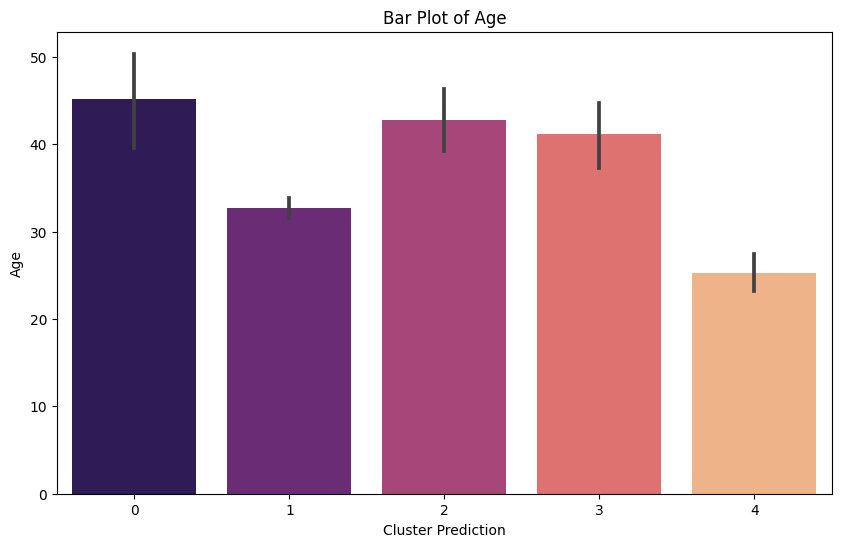

In [ ]:

plt.figure(figsize=(10, 6))
sns.barplot(x='Clusters', y='Age', palette='magma', data=df_copy)
plt.xlabel('Cluster Prediction')
plt.ylabel('Age')
plt.title('Bar Plot of Age')
plt.show()

In [ ]:
#cluster(0) mid 40's
#(1) 40's
#(2)mid 20's
#(3)early 40's
#(4)30's

c:\Users\roaal\anaconda3\New folder\New folder\envs\copy\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\roaal\anaconda3\New folder\New folder\envs\copy\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\roaal\anaconda3\New folder\New folder\envs\copy\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


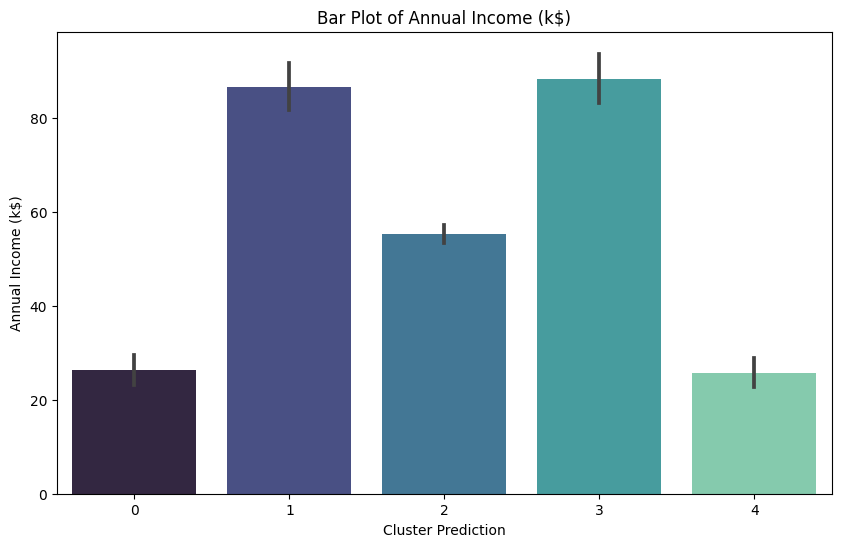

In [ ]:

plt.figure(figsize=(10, 6))
sns.barplot(x='Clusters', y='Annual Income (k$)', palette='mako', data=df_copy)
plt.xlabel('Cluster Prediction')
plt.ylabel('Annual Income (k$)')
plt.title('Bar Plot of Annual Income (k$)')
plt.show()

In [ ]:
#(0)and (2)we could consider them the same as they both have annual income slightly close to 30k
#(1) comes with the highest annual income 85k
#(3)more than 50k less than 60k
#(4)slightly less than cluster (1)

c:\Users\roaal\anaconda3\New folder\New folder\envs\copy\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\roaal\anaconda3\New folder\New folder\envs\copy\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\roaal\anaconda3\New folder\New folder\envs\copy\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


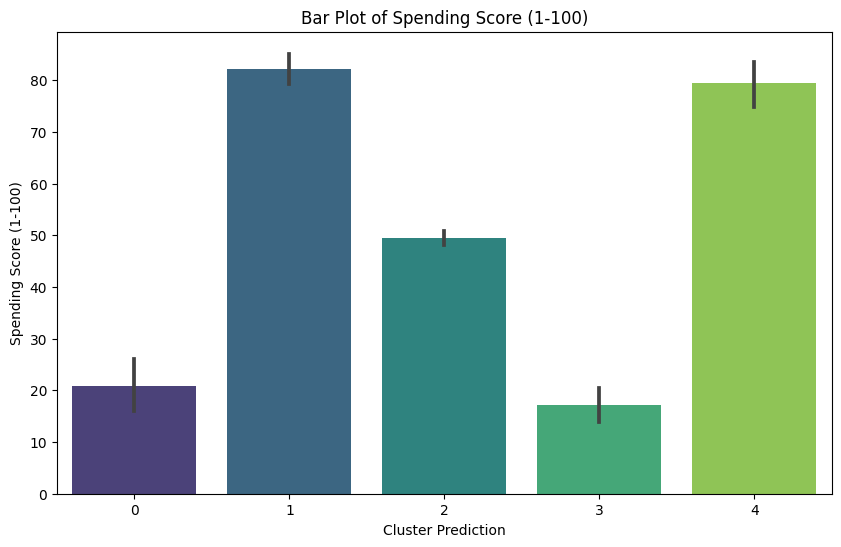

In [ ]:

plt.figure(figsize=(10, 6))
sns.barplot(x='Clusters', y='Spending Score (1-100)', palette='viridis', data=df_copy)
plt.xlabel('Cluster Prediction')
plt.ylabel('Spending Score (1-100)')
plt.title('Bar Plot of Spending Score (1-100)')
plt.show()

In [ ]:
#(0)20 point
#(1)the least spending point (1)<20pt
#(2)less than 80pt
#(3)50 pt
#(4)the highest with 80pt

In [ ]:
gender_distribution = df_copy.groupby(['Clusters', 'Gender']).size().reset_index(name='Count')

for cluster in df_copy['Clusters'].unique():
    cluster_data = gender_distribution[gender_distribution['Clusters'] == cluster]
    print(f"Cluster {cluster}:")
    for index, row in cluster_data.iterrows():
        print(f"{row['Gender']}: {row['Count']}")
    print()

Cluster 0:
0: 9
1: 14

Cluster 4:
0: 9
1: 13

Cluster 2:
0: 33
1: 48

Cluster 1:
0: 18
1: 21

Cluster 3:
0: 19
1: 16



In [ ]:
#cluster (3)has the biggest difference with 15 , while cluster(4,1) have the smallest difference with 3.

c:\Users\roaal\anaconda3\New folder\New folder\envs\copy\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\roaal\anaconda3\New folder\New folder\envs\copy\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\roaal\anaconda3\New folder\New folder\envs\copy\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


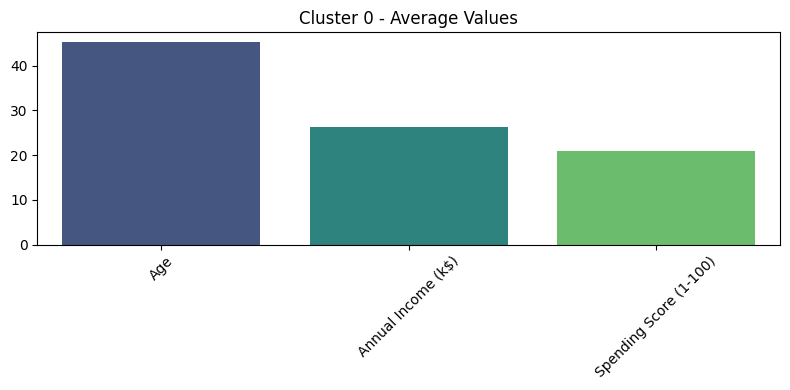

c:\Users\roaal\anaconda3\New folder\New folder\envs\copy\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\roaal\anaconda3\New folder\New folder\envs\copy\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\roaal\anaconda3\New folder\New folder\envs\copy\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


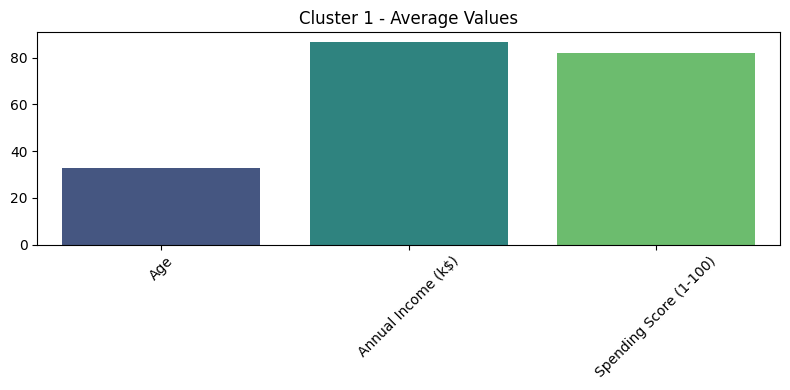

c:\Users\roaal\anaconda3\New folder\New folder\envs\copy\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\roaal\anaconda3\New folder\New folder\envs\copy\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\roaal\anaconda3\New folder\New folder\envs\copy\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


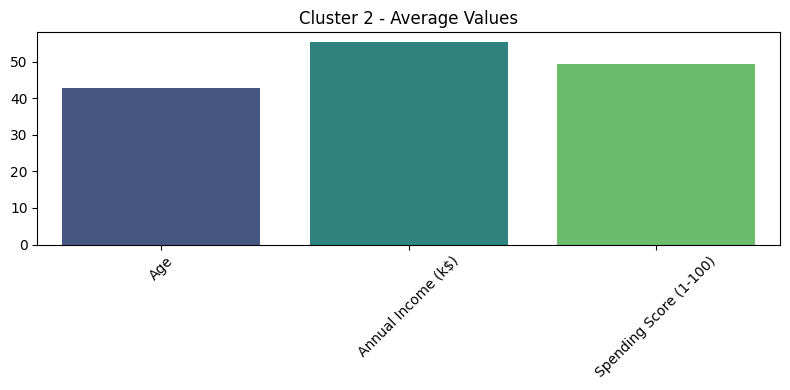

c:\Users\roaal\anaconda3\New folder\New folder\envs\copy\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\roaal\anaconda3\New folder\New folder\envs\copy\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\roaal\anaconda3\New folder\New folder\envs\copy\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


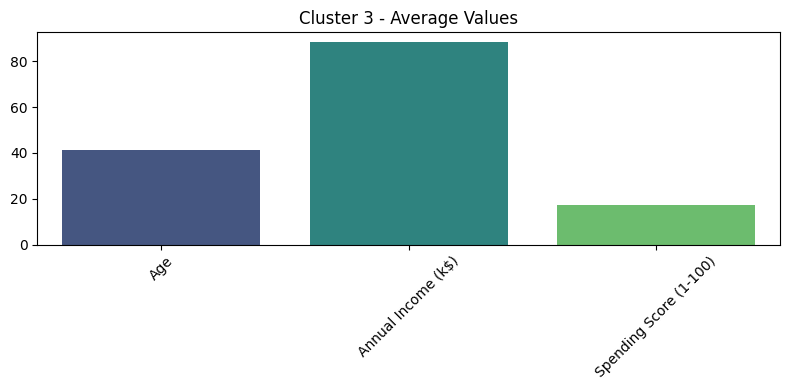

c:\Users\roaal\anaconda3\New folder\New folder\envs\copy\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\roaal\anaconda3\New folder\New folder\envs\copy\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\roaal\anaconda3\New folder\New folder\envs\copy\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


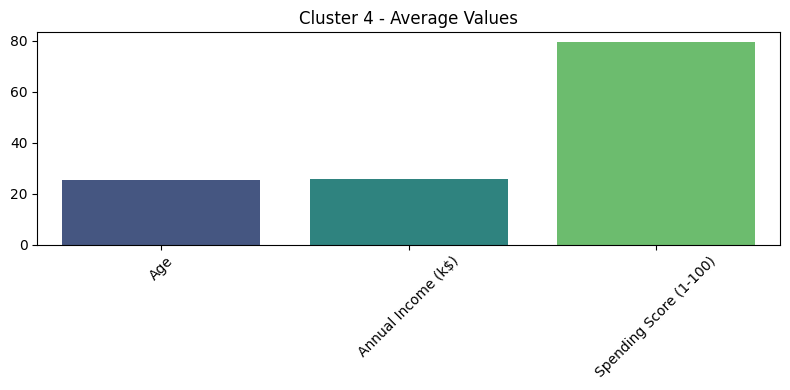

In [ ]:
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
data_no_clusters = df_copy.drop(['Clusters', 'Gender'], axis=1)

unique_clusters = np.unique(df_copy['Clusters'])

for cluster in unique_clusters:
    cluster_data = data_no_clusters[df_copy['Clusters'] == cluster]
    cluster_avg = cluster_data.mean()

    plt.figure(figsize=(8, 4))
    sns.barplot(x=cluster_avg.index, y=cluster_avg.values, palette='viridis')
    plt.title(f'Cluster {cluster} - Average Values')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
#in conc.
#cluster 0 mostly females with annual income slightly close to 30k and low spending score 20pt and in their mid 40's
#cluster 1 mainly males with the highest annual income 85k and least spending score 20pt and in their 40's
#cluster 2 Primarily females with annual income slightly close to 30k( similar to cluster 0)and spending score less than 80k. in their mid 20's
#cluser 3 Predominantly females with annual income ranging from 50 to 60, and spending score of 50pt, in their early 40's
#cluster 4 Generally females with annual income slightly less than 85k (cluster1) highest spending score 80, in their 30's

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
x = df_copy.loc[:, ['Annual Income (k$)', 'Spending Score (1-100)']].values

In [ ]:
dbscan = DBSCAN(eps = 8, min_samples = 4).fit(x)
labels = dbscan.labels_

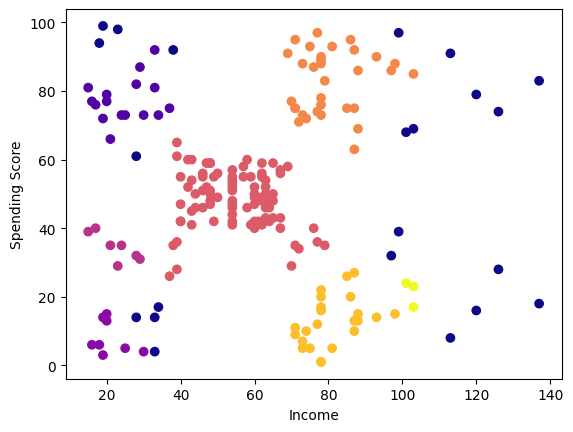

In [ ]:
plt.scatter(x[:, 0], x[:,1], c = labels, cmap= "plasma")
plt.xlabel("Income")
plt.ylabel("Spending Score")
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
kmeans_silhouette = silhouette_score(df_copy, df_copy['Clusters'])
dbscan_silhouette = silhouette_score(df_copy, dbscan.labels_)

print(f"KMeans Silhouette Score: {kmeans_silhouette:.3f}")
print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.3f}")

KMeans Silhouette Score: 0.446
DBSCAN Silhouette Score: 0.255


In [ ]:
#we could see that kmeans clusters are more visible, dbscan clusters are way scatterd
#kmeans has a higher score, and in silhouette the higher the better quality

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from joblib import dump, load

In [ ]:
dump(kmeans, 'kmeans_model.joblib')

['kmeans_model.joblib']

In [ ]:
dump(dbscan, 'dbscan_model.joblib')

['dbscan_model.joblib']

In [ ]:
loaded_dbscan = load('dbscan_model.joblib')

In [ ]:
loaded_kmeans = load('kmeans_model.joblib')

In [ ]:
kmeans.fit(df_copy)

c:\Users\roaal\anaconda3\New folder\New folder\envs\copy\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(init='random', n_clusters=5, random_state=0)

In [ ]:
cluster_labels = kmeans.labels_
cluster_labels_to_labels = {
    0: 'Label A',
    1: 'Label B',
    2: 'Label C',
    3: 'Label D',
    4: 'Label E'
}

In [ ]:
assigned_labels = [cluster_labels_to_labels[label] for label in cluster_labels]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_copy, assigned_labels, test_size=0.2, random_state=42)

In [ ]:
logistic_regression = LogisticRegression()

In [ ]:
logistic_regression.fit(X_train, y_train)

c:\Users\roaal\anaconda3\New folder\New folder\envs\copy\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predictions = logistic_regression.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [ ]:
import joblib
joblib_file = "kmeans_model"
joblib.dump (logistic_regression, joblib_file)

loaded_model = joblib.load(open(joblib_file, 'rb'))

pred_Y = loaded_model.predict(X_test)
from sklearn.metrics import accuracy_score

accuracy_value = accuracy_score(y_test, predictions)
rounded_accuracy = np.round(accuracy_value, 2)

print("Accuracy:", rounded_accuracy)


Accuracy: 1.0


In [ ]:
from sklearn.metrics import accuracy_score

accuracy_value = accuracy_score(y_test, predictions)
rounded_accuracy = np.round(accuracy_value, 2)

print("Accuracy:", rounded_accuracy)


Accuracy: 1.0


In [ ]:

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Assuming your preprocessed data is stored in df_scaled

# Extract the columns for training the scaler and clustering algorithm
columns_to_scale = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
df_scaled_training = df_copy[columns_to_scale]

# Train the clustering algorithm
kmeans = KMeans(n_clusters=5)  # Set the desired number of clusters
kmeans.fit(df_scaled_training)

scaler = StandardScaler()
scaler.fit(df_scaled_training)  # Fit the StandardScaler on the training data

# Function for predicting the cluster label for new data points
def predict_cluster(new_data):
    # Preprocess the new data
    new_data_array = np.array(new_data)  # Convert the list to a NumPy array
    new_data_scaled = scaler.transform(new_data_array[:].reshape(1, -1))  # Exclude gender from scaling

    # Predict the cluster label
    cluster_label = kmeans.predict(new_data_scaled)

    return cluster_label

# Example usage
new_data = [1, 43, 30, 20]  # Replace with your own values
predicted_cluster = predict_cluster(new_data)
print("Predicted Cluster:", predicted_cluster)


Predicted Cluster: [4]


c:\Users\roaal\anaconda3\New folder\New folder\envs\copy\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\roaal\anaconda3\New folder\New folder\envs\copy\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\roaal\anaconda3\New folder\New folder\envs\copy\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
